In [1]:
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
import tensorflow as tf

import matplotlib.pyplot as plt
import cv2

from PIL import Image
import numpy as np
import os

In [2]:
num_classes = 3
img_rows, img_cols = 224, 224
batch_size = 32

In [3]:
train_data_dir = 'images/final/'
# validation_data_dir = 'images/validation'


In [4]:
train_datagen = ImageDataGenerator( rescale=1./255,
#                                    rotation_range=30,
#                                    shear_range=0.3,
#                                    zoom_range=0.3,
#                                    width_shift_range=0.4,
#                                    height_shift_range=0.4,
                                   horizontal_flip=True,
                                   validation_split=0.2
                                  )

validation_datagen = ImageDataGenerator(rescale=1./255)


In [7]:
train = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_rows,img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True,
                                                    subset="training"
                                                   )

Found 228 images belonging to 3 classes.


In [6]:
validation = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_rows,img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True,
                                                    subset="validation"
                                                   )

Found 55 images belonging to 3 classes.


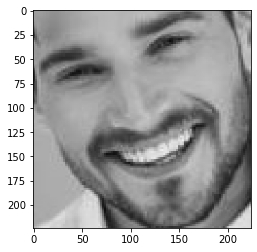

In [22]:
plt.imshow(train.next()[0][0])

In [9]:
model = Sequential()

# Block-1
# model.add(Conv2D(32,(3,3),padding='same',input_shape=(img_rows,img_cols,1)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',input_shape=(img_rows,img_cols,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.2))

# Block-2
# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.2))

# Block-3
# model.add(Conv2D(128,(3,3),padding='same'))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.2))

# Block-4
# model.add(Conv2D(256,(3,3),padding='same'))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.2))

# Block-5
# model.add(Conv2D(512,(3,3),padding='same'))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
model.add(Conv2D(512,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.2))

# Block-6
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Block-7
model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Block-8
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [10]:
model = tf.keras.Sequential([
    ## Batch 1
    tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape = (150, 150, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(4, 4),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    ## Batch 2
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    ## Batch 3
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    ## Batch 4
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
#     ## Batch 5
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    ## Batch 6
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(num_classes, activation='softmax')     
])


model.compile(loss = 'categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
print(model.summary())

In [11]:
# checkpoint = ModelCheckpoint('Emotion_little_vgg.h5',
#                              monitor='val_loss',
#                              mode='min',
#                              save_best_only=True,
#                              verbose=1)

# earlystop = EarlyStopping(monitor='val_loss',
#                           min_delta=0,
#                           patience=3,
#                           verbose=1,
#                           restore_best_weights=True
#                           )

# reduce_lr = ReduceLROnPlateau(monitor='val_loss',
#                               factor=0.2,
#                               patience=3,
#                               verbose=1,
#                               min_delta=0.0001)

# callbacks = [earlystop,checkpoint,reduce_lr]

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(),
              metrics=['accuracy'])

nb_train_samples = 1183 
nb_validation_samples = 3006

In [16]:
epochs = 5

In [25]:

history=model.fit(
    train,
    epochs=epochs,
    validation_data=validation,
#     steps_per_epoch=nb_train_samples//batch_size,
#   callbacks=callbacks,
#   validation_steps=nb_validation_samples//batch_size
)

Epoch 1/5
8/8 [==============================] - 32s 4s/step - loss: 0.6108 - accuracy: 0.7895 - val_loss: 1.7573 - val_accuracy: 0.3273
Epoch 2/5
8/8 [==============================] - 32s 4s/step - loss: 0.4993 - accuracy: 0.7895 - val_loss: 1.6226 - val_accuracy: 0.3091
Epoch 3/5
8/8 [==============================] - 29s 4s/step - loss: 0.5915 - accuracy: 0.7807 - val_loss: 1.6459 - val_accuracy: 0.3273
Epoch 4/5
8/8 [==============================] - 38s 5s/step - loss: 0.4248 - accuracy: 0.8596 - val_loss: 2.0895 - val_accuracy: 0.3091
Epoch 5/5
8/8 [==============================] - 34s 4s/step - loss: 0.4303 - accuracy: 0.8158 - val_loss: 2.5487 - val_accuracy: 0.3091


In [24]:
history=model.fit(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
#                 callbacks=callbacks,
#                 validation_data=validation_generator,
#                 validation_steps=nb_validation_samples//batch_size
                            )

NameError: name 'train_generator' is not defined

In [ ]:
history=model.fit(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
#                 callbacks=callbacks,
#                 validation_data=validation_generator,
#                 validation_steps=nb_validation_samples//batch_size
                            )

In [ ]:
img_path = "C:/Users/hamma/Desktop/FYP/face landmarks/images/FERG_DB_256/ray/ray_sadness/ray_sadness_91.png"

In [ ]:
img = image.load_img(img_path, target_size=(150, 150), color_mode = "grayscale")
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_batch.shape

In [ ]:
predicted = np.argmax(model.predict(img_batch))
predicted